In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(1)

In [2]:
df = pd.read_csv("diabetes_data.csv")
df

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [3]:
x = df.drop("Y",axis=1)
y = df.Y

from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)


In [31]:
x_scaled

array([[ 0.80050009,  1.06548848,  1.29708846, ..., -0.05449919,
         0.41853093, -0.37098854],
       [-0.03956713, -0.93853666, -1.08218016, ..., -0.83030083,
        -1.43658851, -1.93847913],
       [ 1.79330681,  1.06548848,  0.93453324, ..., -0.05449919,
         0.06015558, -0.54515416],
       ...,
       [ 0.87686984,  1.06548848, -0.33441002, ..., -0.23293356,
        -0.98564884,  0.32567395],
       [-0.9560041 , -0.93853666,  0.82123474, ...,  0.55838411,
         0.93616291, -0.54515416],
       [-0.9560041 , -0.93853666, -1.53537419, ..., -0.83030083,
        -0.08875225,  0.06442552]])

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_rem, y_train, y_rem = train_test_split(x_scaled,y, train_size=0.7)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem,y_rem, test_size=0.5)

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

model = Ridge(alpha=8)
model.fit(x_train, y_train)
y_pred = model.predict(x_valid)
model.score(x_valid, y_valid)

0.6673045916914946

In [34]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_valid, y_pred)

1935.072892289362

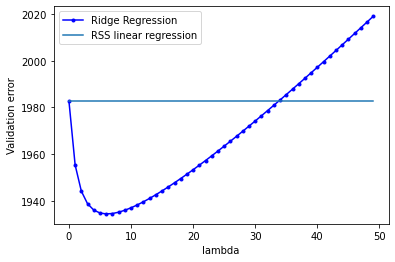

In [35]:
validation_error_ridge = np.zeros(50)
validation_error_rss = np.zeros(50)
hyperparameter = np.arange(0,50,1)

for i in range(50):
    model = Ridge(alpha=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)
    validation_error_ridge[i] = mean_squared_error(y_valid, y_pred)
    rss = LinearRegression()
    rss.fit(x_train, y_train)
    rss_y_pred = rss.predict(x_valid)
    validation_error_rss[i]= mean_squared_error(y_valid, rss_y_pred)


plt.plot(hyperparameter, validation_error_ridge ,'b.-', label='Ridge Regression')    
plt.plot(hyperparameter, validation_error_rss, label ='RSS linear regression')

plt.ylabel('Validation error')
plt.xlabel('lambda')
plt.legend()
plt.show()

In [36]:
model = Ridge(alpha=7)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


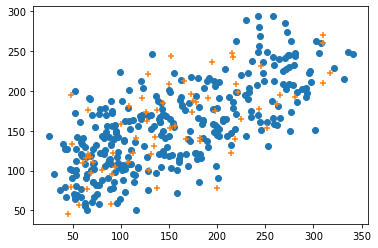

In [37]:
plt.scatter(y_train, y_pred_train)
plt.scatter(y_test, y_pred_test, marker='+')

In [11]:
model.coef_

array([ -0.45095056, -10.85588031,  27.47440831,  15.96253592,
        -9.29608621,  -0.3127618 ,  -5.4612833 ,   7.35660728,
        23.2405654 ,   2.65092463])

In [12]:
model.intercept_

151.33431250859468